In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [6]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [7]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [9]:
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


So, how do we identify all those missing values and deal with them?
How to work with missing data?

Steps for working with missing data:

1. Identify missing data
2. Deal with missing data
3. Correct data format

# Identify and handle missing values

Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:
.replace(A, B, inplace = True) 
to replace A by B.

In [10]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Evaluating for Missing Data
The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

.isnull()
.notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [11]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

# Deal with missing data

How to deal with missing data?
Drop data
    a. Drop the whole row
    b. Drop the whole column
Replace data
    a. Replace it by mean
    b. Replace it by frequency
    c. Replace it based on other functions

Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean
Replace by frequency:

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
Drop the whole row:

"price": 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

Calculate the mean value for the "normalized-losses" column 

In [14]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


Replace "NaN" with mean value in "normalized-losses" column

In [16]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

# Calculate the mean value and Replace "NaN" with mean value for the "bore" column

In [18]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Averages of bore  : ",avg_bore)

df["bore"].replace(np.nan, avg_bore, inplace = True)

Averages of bore  :  3.3297512437810957


# Question #1: 
Based on the example above, replace NaN in "stroke" column with the mean value.

In [20]:
mean_stroke = df["stroke"].astype("float").mean(axis= 0)

print ("Mean of stroke : ", mean_stroke)

df["stroke"].replace(np.nan, mean_stroke, inplace = True)


Mean of stroke :  3.2554228855721337


Calculate the mean value and Replace "NaN" with mean value for the "horsepower" column

In [21]:
mean_horsepower = df["horsepower"].astype("float").mean(axis = 0)
print("Mean of horsepower : ",mean_horsepower)
    
df["horsepower"].replace(np.nan, mean_horsepower , inplace = True)

Mean of horsepower :  104.25615763546799


Calculate the mean value and Replace "NaN" with mean value for the "peak-rpm" column

In [24]:
mean_peakrpm = df["peak-rpm"].astype("float").mean(axis = 0)
print("Mean of peak-rpm : ",mean_peakrpm)
    
df["peak-rpm"].replace(np.nan, mean_peakrpm, inplace = True)

Mean of peak-rpm :  5125.369458128079


#replace the missing 'num-of-doors' values by the most frequent

In [25]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

#simply drop whole row with NaN in "price" column

In [26]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Correct data format

We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

In [28]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [29]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

# data normalization

Convert mpg to L/100km by mathematical operation (235 divided by mpg)

In [34]:
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556


# Question #2: ¶
According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [39]:
df["highway-mpg"] = 235/df["highway-L/100km"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-mpg
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556,10.681818


In [40]:
df.rename(columns={'highway-mpg' : 'highway-L/100km'},
    inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556,10.681818


Normalization is the process of transforming values of several variables into a similar range

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

Target: would like to normalize those variables so their value ranges from 0 to 1

Approach: replace original value by (original value)/(maximum value)

In [43]:
df["length"] = df["length"] / df["length"].max()
df["length"].head()

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

In [44]:
df["width"].head()

0    64.1
1    64.1
2    65.5
3    66.2
4    66.4
Name: width, dtype: float64

In [45]:
df["width"] = df["width"]/df["width"].max()
df["width"].head()

0    0.890278
1    0.890278
2    0.909722
3    0.919444
4    0.922222
Name: width, dtype: float64

# Question #3: ¶
According to the example above, normalize the column "height".

In [48]:
df["height"]= df["height"]/df["height"].max()
df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


# Data Binning¶

Why binning?
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

In [63]:
df["horsepower"].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [53]:
df["horsepower"].dtypes

dtype('O')

In [56]:
df["horsepower"] = df["horsepower"].astype(int, copy=True)
df["horsepower"].dtypes

dtype('int32')

Plot the histogram of horsepower to see what the distribution of horsepower looks like and Rearrange them 

In [66]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

Text(0.5, 1.0, 'horsepower bins')

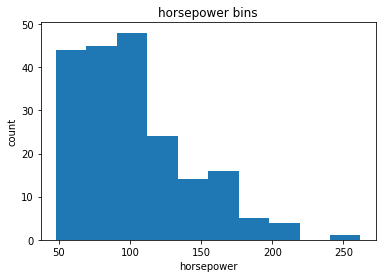

In [68]:
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [61]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [59]:
horsepower_grp = ["Low","Medium","high"]

In [73]:
df["group_horsepower"] = pd.cut(df["horsepower"],bins , labels = horsepower_grp,include_lowest =True )
df[["horsepower","group_horsepower"]].head()

,horsepower,group_horsepower
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [74]:
df["group_horsepower"].value_counts()

Low       153
Medium     43
high        5
Name: group_horsepower, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

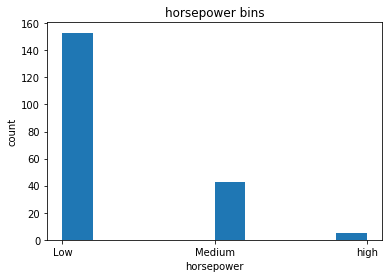

In [70]:
plt.pyplot.hist(df["group_horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Indicator Variable (or Dummy Variable)

We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.

In [75]:
df["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: fuel-type, Length: 201, dtype: object

In [78]:
dummy_variable_1= pd.get_dummies(df["fuel-type"])

In [79]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

In [80]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [81]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,group_horsepower,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27.0,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27.0,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26.0,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30.0,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22.0,17450.0,13.055556,10.681818,Low,0,1


# Question #4: 
Similar to before, create an indicator variable for the column "aspiration"

In [82]:
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
196      std
197    turbo
198      std
199    turbo
200    turbo
Name: aspiration, Length: 201, dtype: object

In [83]:
dummy = pd.get_dummies(df["aspiration"])

In [84]:
dummy.rename(columns={'std':'aspiration_std', 'turbo':'aspiration_turbo'}, inplace=True)

# Question #5: 
Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.

In [88]:
df =pd.concat([df,dummy], axis = 1)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,city-L/100km,highway-L/100km,group_horsepower,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,19045.0,12.368421,9.400000,Medium,0,1,0,1,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,22470.0,9.038462,8.703704,Low,1,0,0,1,0,1


In [89]:
df.drop("aspiration", axis = 1, inplace = True)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,price,city-L/100km,highway-L/100km,group_horsepower,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,19045.0,12.368421,9.400000,Medium,0,1,0,1,0,1
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,22470.0,9.038462,8.703704,Low,1,0,0,1,0,1
